<a href="https://colab.research.google.com/github/RamcharanChandragiri/NATURAL-LANGUAGE-PROCESSING/blob/main/NLP_ASSIGNMENT_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: TF-IDF Analysis of Research Abstracts

Activities:

o Load abstracts from one research category.
o Clean text (remove numbers, punctuation).
o Compute TF-IDF for all abstracts.

Identify:

o Top 20 terms across the corpus

Visualize:

o Word cloud using TF-IDF weights
o Heatmap of TF-IDF scores for top 10 terms across 5
documents

Expected Output:

o TF-IDF feature list
o Word cloud
o Heatmap visualization
o Submit colab notebook as pdf with proper headings and
discussion section in the end of notebook.

Dataset Source

o arXiv Abstract Dataset (small subset)
o Download from Kaggle:
o “arXiv Paper Abstracts”
o (Students may select one domain, e.g., CS or AI)Tokenize
essay text.


In [25]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
df = pd.read_csv('/content/arxiv_data.csv')  # adjust filename if needed
df.head()


,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [29]:
cs_df = df[df['terms'].str.contains('cs', na=False)]
cs_df = cs_df[['summaries']].dropna()

cs_df.head()

,summaries
0,Stereo matching is one of the widely used tech...
1,The recent advancements in artificial intellig...
2,"In this paper, we proposed a novel mutual cons..."
3,Consistency training has proven to be an advan...
4,"To ensure safety in automated driving, the cor..."


In [30]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)           # remove numbers
    text = re.sub(r'[^\w\s]', '', text)       # remove punctuation
    text = re.sub(r'\s+', ' ', text)          # remove extra spaces
    return text


In [32]:
cs_df['clean_abstract'] = cs_df['summaries'].apply(clean_text)
cs_df.head()

,summaries,clean_abstract
0,Stereo matching is one of the widely used tech...,stereo matching is one of the widely used tech...
1,The recent advancements in artificial intellig...,the recent advancements in artificial intellig...
2,"In this paper, we proposed a novel mutual cons...",in this paper we proposed a novel mutual consi...
3,Consistency training has proven to be an advan...,consistency training has proven to be an advan...
4,"To ensure safety in automated driving, the cor...",to ensure safety in automated driving the corr...


In [33]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

tfidf_matrix = vectorizer.fit_transform(cs_df['clean_abstract'])


In [34]:
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)


In [35]:
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)
top_20_terms = mean_tfidf.head(20)

top_20_terms


,0
learning,0.036001
data,0.030804
image,0.028415
model,0.027396
network,0.023419
method,0.022423
models,0.021955
images,0.021590
methods,0.021562
graph,0.021378


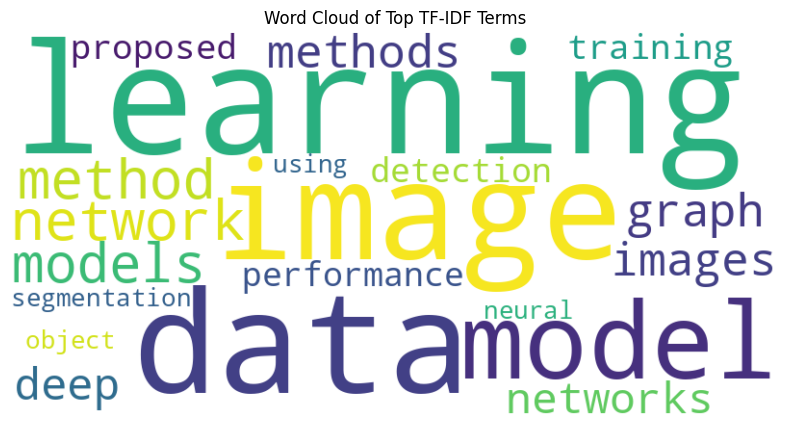

In [36]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(top_20_terms)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top TF-IDF Terms')
plt.show()


In [37]:
top_10_terms = mean_tfidf.head(10).index
heatmap_data = tfidf_df[top_10_terms].head(5)


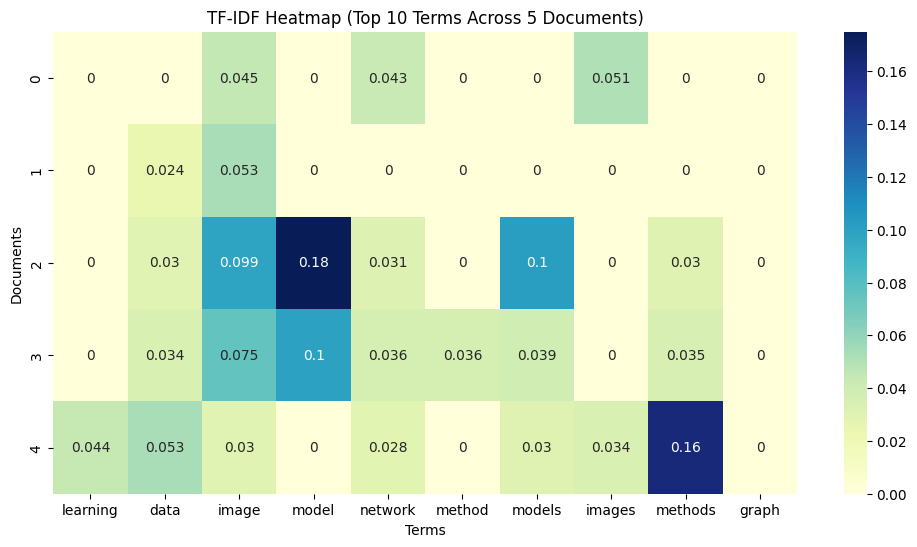

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('TF-IDF Heatmap (Top 10 Terms Across 5 Documents)')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.show()


In [39]:
feature_names[:20]


array(['abdominal', 'abilities', 'ability', 'ablation', 'able',
       'abnormal', 'abnormalities', 'absence', 'absent', 'absolute',
       'abstract', 'abstraction', 'abstractions', 'abundance', 'abundant',
       'ac', 'academic', 'accelerate', 'accelerated', 'accelerates'],
      dtype=object)